In [1]:
import ipysheet
import ipywidgets
sheet = ipysheet.sheet()
sheet

Sheet(columns=5, layout=Layout(height='auto', width='auto'), rows=5)

In [2]:
ipysheet.__version__

'0.6.0'

In [3]:
ipywidgets.__version__

'8.0.2'

In [4]:
sheet = ipysheet.sheet(rows=3, columns=4)
cell1 = ipysheet.cell(0, 0, 'Hello')
cell2 = ipysheet.cell(2, 0, 'World')
cell_value = ipysheet.cell(2,2, 42.)
sheet

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='text', value='Hello'), Cell(colu…

In [5]:
import ipywidgets as widgets
sheet = ipysheet.sheet(rows=3, columns=2, column_headers=False, row_headers=False)
cell_a = ipysheet.cell(0, 1, 1, label_left='a')
cell_b = ipysheet.cell(1, 1, 2, label_left='b')
cell_sum = ipysheet.cell(2, 1, 3, label_left='sum', read_only=True)

# create a slider linked to cell a
slider = widgets.FloatSlider(min=-10, max=10, description='a')
widgets.jslink((cell_a, 'value'), (slider, 'value'))

# changes in a or b should trigger this function
def calculate(change):
    cell_sum.value = cell_a.value + cell_b.value

cell_a.observe(calculate, 'value')
cell_b.observe(calculate, 'value')


widgets.VBox([sheet, slider])

In [6]:
from pythreejs import *
from pythreejs._example_helper import use_example_model_ids
use_example_model_ids()

BoxGeometry( width=5, height=10, depth=15, widthSegments=5, heightSegments=10, depthSegments=15 )

BoxGeometry(depth=15.0, depthSegments=15, height=10.0, heightSegments=10, width=5.0, widthSegments=5)

In [7]:
IcosahedronGeometry(radius=10, _flat=True)

IcosahedronGeometry(radius=10.0)

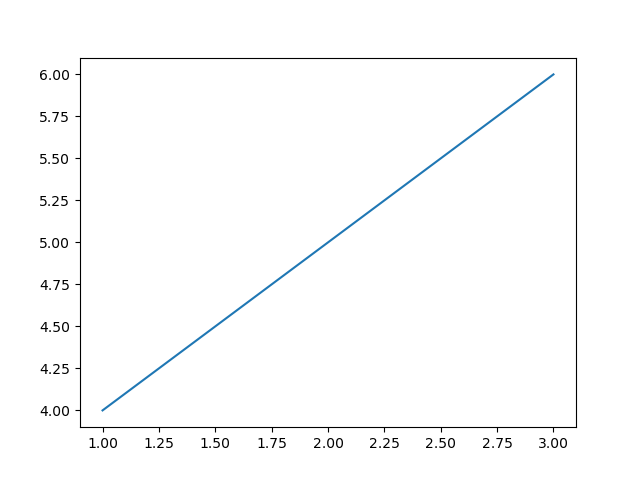

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)

In [9]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 40,Total memory: 184.96 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33555,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 40
Started: Just now,Total memory: 184.96 GiB
Comm: tcp://127.0.0.1:34625,Total threads: 5
Dashboard: http://127.0.0.1:38227/status,Memory: 23.12 GiB
Nanny: tcp://127.0.0.1:44071,


In [10]:
import dask.array as da
x = da.random.random((10000, 10000), chunks="16 MiB")

In [11]:
y = (x + x.T) - x.mean(axis=0)
y.sum().compute()

50001272.37647435

In [12]:
import xarray as xr
import geoviews as gv
#gv.extension('bokeh')

In [13]:
air_ds = xr.tutorial.open_dataset('air_temperature').load()
air = air_ds.air
air_ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [14]:
air2d = air.sel(time='2013-06-01 12:00')
air2d

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[270.9    , 270.9    , 270.79   , ..., 261.5    , 262.79   ,
        264.29   ],
       [273.4    , 273.5    , 273.4    , ..., 259.6    , 261.79   ,
        264.6    ],
       [270.4    , 268.9    , 268.     , ..., 260.29   , 262.9    ,
        266.29   ],
       ...,
       [298.19998, 297.     , 296.19998, ..., 298.     , 296.79   ,
        296.     ],
       [298.19998, 297.79   , 296.79   , ..., 297.69998, 297.19998,
        296.6    ],
       [298.19998, 298.19998, 297.9    , ..., 297.79   , 297.6    ,
        297.69998]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-06-01T12:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [15]:
air_dataset = gv.Dataset((air2d.lon.values, air2d.lat.values, air2d.data), ['lon', 'lat'], 'T')
air_dataset

:Dataset   [lon,lat]   (T)

In [16]:
gv.Image(air_dataset)

:Image   [lon,lat]   (T)

In [17]:
import cupy as cp
x = cp.array([1,2,3])
x.mean()

array(2.)

In [18]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt